 # <p style="background-color:#1E90FF;font-family:Georgia;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Customer Lifetime Value (CLTV) Prediction</b></p>
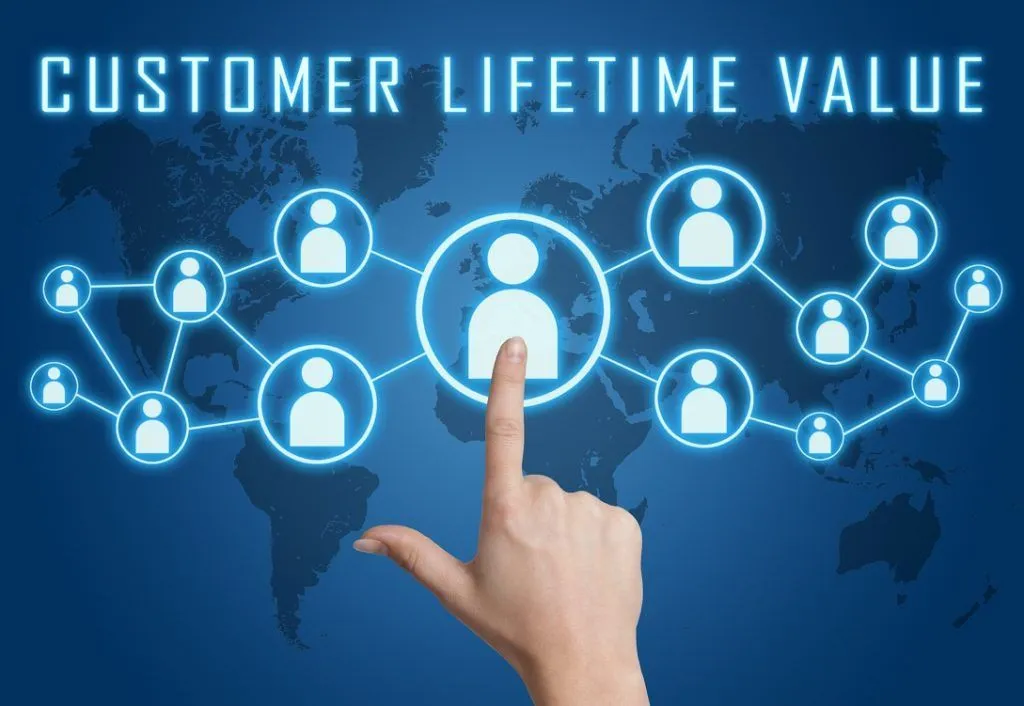

The customer lifetime value (CLTV), also known as lifetime value, is the total revenue a company expects to earn over the lifetime of their relationship with a single customer. The customer lifetime value calculation accounts for the customer acquisition costs, operating expenses, and costs to produce the goods or services that the company is manufacturing. Many companies tend to overlook the CLTV metric but the lifetime value of customers is essential to the growth of a company.

In this project, We are going to build some machine learning models that predicts our customers lifetime value. We were inspired by [Karaman's project](https://towardsdatascience.com/data-driven-growth-with-python-part-3-customer-lifetime-value-prediction-6017802f2e0f)

# <p style="background-color:#1E90FF;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>About Dataset</b></p>

**Turkish Market Sales Dataset With 9.000+Items**= https://www.kaggle.com/datasets/omercolakoglu/turkish-market-sales-dataset-with-9000items

This dataset contains a supermarket data in Turkish Language.

There are more than 600.000 sales rows, contains

52.000+ unique Turkish customername,gender,age,birthdate etc.

9.000+ Categorized and subcategorized items with category1,category2,category3,category4

81 Stores

1200+ Salesman

Geographic location information (Latitude, longitude)

The data contains 3 month sales.

All the data was artificial. Sales created randomly according to population of the cities. Also all customernames are artificial too.

# <p style="background-color:#1E90FF;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Importing Basic Libraries and Dataset</b></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
from datetime import datetime, timedelta, date

In [2]:
data=pd.read_excel('MarketSales.xlsx')
data

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,...,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
0,11738.0,5863.0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.00,2.00,1.85,52.0,...,467369,Sercan KIZILOK,156,SPRİTE,İÇECEK,GAZLI İÇECEK,GAZOZ,2017-01-08 16:16:11,2017-01-08 16:17:13,E
1,10537.0,8.0,TOZ SEKER,18105,2017-01-06,5.0,2.65,13.25,12.27,8.0,...,131464,İsmet ŞINGIR,NaN,NaN,İÇECEK,ÇAY KAHVE,SEKER TATLANDIRICI,2017-01-07 11:04:34,2017-01-07 11:05:37,E
2,11335.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3,11336.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
4,10115.0,12808.0,FALIM SAKIZ 5LI CILEK,18005,2017-01-05,1.0,0.40,0.40,0.37,41.0,...,447336,Habibe AYSAN,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-06 14:00:30,2017-01-06 14:01:03,K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611103,511703.0,7.0,EKMEK 250 GR,134656,2017-03-18,1.0,0.90,0.90,0.89,66.0,...,374191,Mahmut BAYATGİL,NaN,NaN,GIDA,UNLU MAMÜLLER,EKMEK,2017-03-19 09:39:54,2017-03-19 09:40:50,E
611104,511496.0,7.0,EKMEK 250 GR,134630,2017-03-18,1.0,0.90,0.90,0.89,7.0,...,656248,Gamze BOTUÇ,NaN,NaN,GIDA,UNLU MAMÜLLER,EKMEK,2017-03-19 20:30:58,2017-03-19 20:31:17,K
611105,492612.0,7.0,EKMEK 250 GR,130100,2017-03-15,1.0,0.90,0.90,0.89,59.0,...,78643,Cengiz BEREKETÇİ,NaN,NaN,GIDA,UNLU MAMÜLLER,EKMEK,2017-03-16 17:51:04,2017-03-16 17:51:18,E
611106,512343.0,7.0,EKMEK 250 GR,134762,2017-03-18,1.0,0.90,0.90,0.88,40.0,...,926041,Elifnur EGİNKAYA,NaN,NaN,GIDA,UNLU MAMÜLLER,EKMEK,2017-03-19 17:00:12,2017-03-19 17:01:20,K


# <p style="background-color:#1E90FF;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Understanding the Dataset (EDA & Data Preprocessing)</b></p>

Let's explore dataframe and check null values, duplicate rows etc.:

In [3]:
datasets = [data]
#titles = []

data_summary = pd.DataFrame({},)
#data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,"ID, ITEMCODE, ITEMNAME, FICHENO, DATE_, AMOUNT, PRICE, LINENETTOTAL, LINENET, BRANCHNR, BRANCH, SALESMAN, CITY, REGION, LATITUDE, LONGITUDE, CLIENTCODE, CLIENTNAME, BRANDCODE, BRAND, CATEGORY_NAME1, CATEGORY_NAME2, CATEGORY_NAME3, STARTDATE, ENDDATE, GENDER",611108,26,0,384824,"ID, ITEMCODE, ITEMNAME, DATE_, AMOUNT, PRICE, LINENETTOTAL, LINENET, BRANCHNR, BRANCH, CITY, REGION, LATITUDE, LONGITUDE, CLIENTCODE, CLIENTNAME, BRANDCODE, BRAND, CATEGORY_NAME1, CATEGORY_NAME2, CATEGORY_NAME3, GENDER"


only required features for our analysis:

In [5]:
df1=data[["CLIENTCODE", "DATE_", "FICHENO", "ITEMCODE", "LINENETTOTAL"]]
df1

,CLIENTCODE,DATE_,FICHENO,ITEMCODE,LINENETTOTAL
0,467369,2017-01-07,18456,5863.0,2.00
1,131464,2017-01-06,18105,8.0,13.25
2,656969,2017-01-03,18350,5979.0,0.40
3,656969,2017-01-03,18350,5979.0,0.40
4,447336,2017-01-05,18005,12808.0,0.40
...,...,...,...,...,...
611103,374191,2017-03-18,134656,7.0,0.90
611104,656248,2017-03-18,134630,7.0,0.90
611105,78643,2017-03-15,130100,7.0,0.90
611106,926041,2017-03-18,134762,7.0,0.90


In [6]:
df1.isnull().sum()

CLIENTCODE      18348
DATE_               1
FICHENO             0
ITEMCODE         7167
LINENETTOTAL        1
dtype: int64

In [7]:
df1.dropna(inplace=True)

In [8]:
df1.isnull().sum()

CLIENTCODE      0
DATE_           0
FICHENO         0
ITEMCODE        0
LINENETTOTAL    0
dtype: int64

In [9]:
df1[df1.duplicated()]

,CLIENTCODE,DATE_,FICHENO,ITEMCODE,LINENETTOTAL
3,656969,2017-01-03,18350,5979.0,0.40
20,18004,2017-01-05,16638,2523.0,0.85
72,1032342,2017-01-05,16721,1919.0,1.50
115,747931,2017-01-02,15772,1623.0,0.85
147,140450,2017-01-03,15811,2700.0,0.35
...,...,...,...,...,...
611058,679673,2017-03-30,154727,19790.0,1.00
611087,557380,2017-03-18,134627,6983.0,0.25
611090,374191,2017-03-18,134656,6432.0,1.15
611092,128731,2017-03-18,134698,6223.0,5.20


As it seen above, there are 50716 duplicate rows.

For instance, Let's look at a specific invoice:

In [14]:
data.loc[data.FICHENO==18350]

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,...,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
2,11335.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3,11336.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3206,11340.0,13917.0,NESCAFE 3 IN 1 CIKOLATALI 13 GR,18350,2017-01-03,2.0,0.35,0.70,0.65,40.0,...,656969,Yağız KUBAL,97,NESTLE,İÇECEK,ÇAY KAHVE,KAHVE,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3260,11338.0,2622.0,NESTLE NESGUIK SUT 180ML KAKAOLU,18350,2017-01-03,1.0,1.15,1.15,1.06,40.0,...,656969,Yağız KUBAL,97,NESTLE,SÜT KAHVALTILIK,SÜT,MEYVELİ SÜT,2017-01-04 14:00:03,2017-01-04 14:01:01,E
5121,11326.0,149.0,ULKER PIKO 25GR-398,18350,2017-01-03,1.0,0.25,0.25,0.24,40.0,...,656969,Yağız KUBAL,146,ÜLKER,GIDA,BÜSKİVİ ÇEREZ,BÜSKİVİ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
5122,11327.0,131.0,ULKER ALBENI KEK 40GR,18350,2017-01-03,1.0,0.50,0.50,0.47,40.0,...,656969,Yağız KUBAL,146,ÜLKER,GIDA,BÜSKİVİ ÇEREZ,KEK,2017-01-04 14:00:03,2017-01-04 14:01:01,E
5235,11339.0,21037.0,"ERIKLI DOGAL MEMBA SU 1,5LT",18350,2017-01-03,1.0,0.65,0.65,0.60,40.0,...,656969,Yağız KUBAL,43,ERİKLİ,İÇECEK,SU MADENSUYU,SU,2017-01-04 14:00:03,2017-01-04 14:01:01,E
16603,11329.0,2739.0,KENT OLIPS STICK MENTOL 28GR,18350,2017-01-03,1.0,0.75,0.75,0.69,40.0,...,656969,Yağız KUBAL,79,KENT,GIDA,SAKIZ SEKERLEME,ŞEKERLEME,2017-01-04 14:00:03,2017-01-04 14:01:01,E
20140,11337.0,899.0,ICIM SUT 200ML ALPELLA CIKOLATALI,18350,2017-01-03,3.0,0.99,2.97,2.75,40.0,...,656969,Yağız KUBAL,67,İÇİM SEHER,SÜT KAHVALTILIK,SÜT,PASTÖRİZE SÜT,2017-01-04 14:00:03,2017-01-04 14:01:01,E
50150,11333.0,22928.0,ULKER DIDO SUTLU GOFRET 40 GR.,18350,2017-01-03,1.0,0.75,0.75,0.69,40.0,...,656969,Yağız KUBAL,146,ÜLKER,GIDA,ÇİKOLATA GOFRET,NaN,2017-01-04 14:00:03,2017-01-04 14:01:01,E


In [16]:
df1.loc[df1.FICHENO==18350][df1.loc[df1.FICHENO==18350].duplicated()]

,CLIENTCODE,DATE_,FICHENO,ITEMCODE,LINENETTOTAL
3,656969,2017-01-03,18350,5979.0,0.4


As it seen above, there are 1 duplicate rows (ITEMCODE=5979.0, ITEMNAME="FALIM SAKIZ 5LI NANE"). Then let's remove duplicate rows:

In [17]:
df1.shape

(585821, 5)

In [18]:
df1.drop(df1[df1.duplicated()].index, axis=0, inplace=True)

In [20]:
df1.shape

(535105, 5)

removed 50716 rows...

In [21]:
df1[df1.duplicated(keep=False)]

,CLIENTCODE,DATE_,FICHENO,ITEMCODE,LINENETTOTAL


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535105 entries, 0 to 611107
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CLIENTCODE    535105 non-null  object        
 1   DATE_         535105 non-null  datetime64[ns]
 2   FICHENO       535105 non-null  int64         
 3   ITEMCODE      535105 non-null  float64       
 4   LINENETTOTAL  535105 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 24.5+ MB


any customer related records:

In [23]:
df1.loc[df1.CLIENTCODE=="467369"]

,CLIENTCODE,DATE_,FICHENO,ITEMCODE,LINENETTOTAL
0,467369,2017-01-07,18456,5863.0,2.00
3363,467369,2017-01-07,18456,11022.0,1.79
11906,467369,2017-01-07,18456,3334.0,2.50
16715,467369,2017-01-07,18456,21683.0,6.93
20165,467369,2017-01-07,18456,3581.0,1.00
20167,467369,2017-01-07,18456,8072.0,2.00
20210,467369,2017-01-07,18456,3847.0,0.50
20232,467369,2017-01-07,18456,9129.0,2.45
20263,467369,2017-01-07,18456,1995.0,1.55
21223,467369,2017-01-07,18456,20133.0,6.85


Now the total amount of each invoice for each customer is important to us:

In [26]:
total_per_FICHE= pd.DataFrame(df1.groupby(["CLIENTCODE", "DATE_", "FICHENO"]).LINENETTOTAL.sum().reset_index())
total_per_FICHE

,CLIENTCODE,DATE_,FICHENO,LINENETTOTAL
0,1,2017-01-28,54511,0.50
1,1,2017-02-01,59977,85.85
2,1,2017-02-01,60106,7.80
3,1,2017-02-28,104605,20.09
4,10,2017-01-18,36591,1.25
...,...,...,...,...
137492,999995,2017-03-24,145474,21.95
137493,ÿ,2017-01-14,29726,1.45
137494,ÿ,2017-01-15,30951,48.88
137495,ÿ,2017-02-28,104086,9.15


observed some non numeric values in X column. firstly lets convert it numeric:

In [27]:
total_per_FICHE['CLIENTCODE'] = pd.to_numeric(total_per_FICHE['CLIENTCODE'], errors='coerce')

In [28]:
total_per_FICHE

,CLIENTCODE,DATE_,FICHENO,LINENETTOTAL
0,1.0,2017-01-28,54511,0.50
1,1.0,2017-02-01,59977,85.85
2,1.0,2017-02-01,60106,7.80
3,1.0,2017-02-28,104605,20.09
4,10.0,2017-01-18,36591,1.25
...,...,...,...,...
137492,999995.0,2017-03-24,145474,21.95
137493,NaN,2017-01-14,29726,1.45
137494,NaN,2017-01-15,30951,48.88
137495,NaN,2017-02-28,104086,9.15


In [29]:
total_per_FICHE["CLIENTCODE"].isnull().sum()

4

4 null values and lets drop them:

In [30]:
total_per_FICHE.dropna(inplace=True)

In [31]:
total_per_FICHE

,CLIENTCODE,DATE_,FICHENO,LINENETTOTAL
0,1.0,2017-01-28,54511,0.50
1,1.0,2017-02-01,59977,85.85
2,1.0,2017-02-01,60106,7.80
3,1.0,2017-02-28,104605,20.09
4,10.0,2017-01-18,36591,1.25
...,...,...,...,...
137488,999995.0,2017-03-09,119300,7.53
137489,999995.0,2017-03-10,121461,29.04
137490,999995.0,2017-03-19,136837,11.85
137491,999995.0,2017-03-23,143802,13.49


In [32]:
total_per_FICHE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137493 entries, 0 to 137492
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CLIENTCODE    137493 non-null  float64       
 1   DATE_         137493 non-null  datetime64[ns]
 2   FICHENO       137493 non-null  int64         
 3   LINENETTOTAL  137493 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 5.2 MB


let's convert it object again:

actually we can convert the FICHENO column to a categorical column

In [37]:
total_per_FICHE["CLIENTCODE"]= total_per_FICHE["CLIENTCODE"].astype('object')
total_per_FICHE["FICHENO"]= total_per_FICHE["FICHENO"].astype('object')

In [38]:
total_per_FICHE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137493 entries, 0 to 137492
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CLIENTCODE    137493 non-null  object        
 1   DATE_         137493 non-null  datetime64[ns]
 2   FICHENO       137493 non-null  object        
 3   LINENETTOTAL  137493 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.2+ MB


# <p style="background-color:#1E90FF;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Lifetime Value Prediction</b></p>

Now, We should split our dataset.

We will use 1 months of data, calculate RFM and use it for predicting next 2 months. 

So we should create two df first and append RFM scores to them.

In [40]:
df_model= total_per_FICHE.copy()

In [41]:
print("First date in dataset: ", df_model['DATE_'].min())

First date in dataset:  2017-01-02 00:00:00


In [42]:
print("Last date in dataset: ", df_model['DATE_'].max())

Last date in dataset:  2017-03-31 00:00:00


create 2 dataframes:

In [43]:
df_last= df_model[(df_model.DATE_ >=  datetime.strptime("2017-2-1", '%Y-%m-%d')) & (df_model.DATE_ <= df_model['DATE_'].max())].reset_index(drop=True)

In [44]:
df_first= df_model[(df_model.DATE_ <  datetime.strptime("2017-2-1", '%Y-%m-%d')) & (df_model.DATE_ >= df_model['DATE_'].min())].reset_index(drop=True)

In [45]:
df_last

,CLIENTCODE,DATE_,FICHENO,LINENETTOTAL
0,1.0,2017-02-01,59977,85.85
1,1.0,2017-02-01,60106,7.80
2,1.0,2017-02-28,104605,20.09
3,10.0,2017-03-15,129427,3.00
4,1000.0,2017-02-04,65029,7.49
...,...,...,...,...
94567,999995.0,2017-03-09,119300,7.53
94568,999995.0,2017-03-10,121461,29.04
94569,999995.0,2017-03-19,136837,11.85
94570,999995.0,2017-03-23,143802,13.49


In [46]:
df_first

,CLIENTCODE,DATE_,FICHENO,LINENETTOTAL
0,1.0,2017-01-28,54511,0.50
1,10.0,2017-01-18,36591,1.25
2,100.0,2017-01-13,28298,25.45
3,100.0,2017-01-16,33365,269.85
4,1000105.0,2017-01-16,33468,24.09
...,...,...,...,...
42916,999903.0,2017-01-14,31623,1.95
42917,999966.0,2017-01-18,35687,13.83
42918,999995.0,2017-01-08,21099,2.87
42919,999995.0,2017-01-20,40491,9.90


We will create our RFM scoring (I won’t go over the details of RFM scoring, <a href="https://www.kaggle.com/code/drindeng/detailed-rfm-analysis-and-k-means-clustering" target="_blank" rel="noopener noreferrer">please see our previous project</a>):

In [47]:
RFM_df= pd.DataFrame(df_first['CLIENTCODE'].unique())
RFM_df.columns = ['CLIENTCODE']
RFM_df

,CLIENTCODE
0,1.0
1,10.0
2,100.0
3,1000105.0
4,1000117.0
...,...
29422,999862.0
29423,999894.0
29424,999903.0
29425,999966.0


for Recency:

In [48]:
recency_df= df_first.groupby('CLIENTCODE')['DATE_'].max().reset_index()
recency_df

,CLIENTCODE,DATE_
0,1.0,2017-01-28
1,2.0,2017-01-28
2,3.0,2017-01-23
3,5.0,2017-01-23
4,7.0,2017-01-31
...,...,...
29422,1100895.0,2017-01-31
29423,1100898.0,2017-01-16
29424,1100931.0,2017-01-29
29425,1100971.0,2017-01-29


In [49]:
last_day_df_first= df_first['DATE_'].max()
last_day_df_first

Timestamp('2017-01-31 00:00:00')

In [50]:
recency_df['Recency']= recency_df['DATE_'].apply(lambda x: (last_day_df_first - x).days)
recency_df

,CLIENTCODE,DATE_,Recency
0,1.0,2017-01-28,3
1,2.0,2017-01-28,3
2,3.0,2017-01-23,8
3,5.0,2017-01-23,8
4,7.0,2017-01-31,0
...,...,...,...
29422,1100895.0,2017-01-31,0
29423,1100898.0,2017-01-16,15
29424,1100931.0,2017-01-29,2
29425,1100971.0,2017-01-29,2


In [51]:
RFM_df= pd.merge(RFM_df, recency_df[['CLIENTCODE','Recency']], on='CLIENTCODE')
RFM_df

,CLIENTCODE,Recency
0,1.0,3
1,10.0,13
2,100.0,15
3,1000105.0,15
4,1000117.0,8
...,...,...
29422,999862.0,10
29423,999894.0,10
29424,999903.0,17
29425,999966.0,13


In [52]:
#order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

Build 4 clusters for recency and add it to dataframe:

In [53]:
from sklearn.cluster import KMeans

In [54]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Recency']])
RFM_df['RecencyCluster'] = kmeans.predict(RFM_df[['Recency']])
RFM_df

,CLIENTCODE,Recency,RecencyCluster
0,1.0,3,3
1,10.0,13,2
2,100.0,15,2
3,1000105.0,15,2
4,1000117.0,8,0
...,...,...,...
29422,999862.0,10,0
29423,999894.0,10,0
29424,999903.0,17,2
29425,999966.0,13,2


In [55]:
RFM_df= order_cluster('RecencyCluster', 'Recency', RFM_df, False)
RFM_df

,CLIENTCODE,Recency,RecencyCluster
0,1.0,3,3
1,1000244.0,1,3
2,1000363.0,4,3
3,1000397.0,3,3
4,1000871.0,0,3
...,...,...,...
29422,998964.0,21,0
29423,999038.0,21,0
29424,999159.0,21,0
29425,999451.0,25,0


In [56]:
RecencyCluster_Stats = RFM_df.groupby("RecencyCluster")["Recency"].describe()
RecencyCluster_Stats

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,4983.0,23.087297,2.325268,20.0,21.0,23.0,25.0,29.0
1,6943.0,15.910701,1.948880,13.0,14.0,16.0,18.0,19.0
2,8828.0,8.935999,1.963726,6.0,7.0,9.0,11.0,12.0
3,8673.0,2.448980,1.724166,0.0,1.0,2.0,4.0,5.0


for Frequency:

In [57]:
frequency_df= df_first.groupby(["CLIENTCODE"]).agg({"FICHENO":"nunique"}).reset_index()
frequency_df.rename(columns={"FICHENO":"Frequency"}, inplace=True)
frequency_df

,CLIENTCODE,Frequency
0,1.0,1
1,2.0,2
2,3.0,3
3,5.0,1
4,7.0,2
...,...,...
29422,1100895.0,2
29423,1100898.0,1
29424,1100931.0,1
29425,1100971.0,2


In [58]:
RFM_df= pd.merge(RFM_df, frequency_df, on='CLIENTCODE')
RFM_df

,CLIENTCODE,Recency,RecencyCluster,Frequency
0,1.0,3,3,1
1,1000244.0,1,3,3
2,1000363.0,4,3,2
3,1000397.0,3,3,2
4,1000871.0,0,3,1
...,...,...,...,...
29422,998964.0,21,0,1
29423,999038.0,21,0,1
29424,999159.0,21,0,1
29425,999451.0,25,0,1


In [59]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Frequency']])
RFM_df['FrequencyCluster'] = kmeans.predict(RFM_df[['Frequency']])
RFM_df

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster
0,1.0,3,3,1,1
1,1000244.0,1,3,3,0
2,1000363.0,4,3,2,2
3,1000397.0,3,3,2,2
4,1000871.0,0,3,1,1
...,...,...,...,...,...
29422,998964.0,21,0,1,1
29423,999038.0,21,0,1,1
29424,999159.0,21,0,1,1
29425,999451.0,25,0,1,1


In [60]:
RFM_df= order_cluster('FrequencyCluster', 'Frequency', RFM_df, True)
RFM_df

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster
0,1.0,3,3,1,0
1,1000871.0,0,3,1,0
2,1001295.0,2,3,1,0
3,1001836.0,4,3,1,0
4,1002428.0,1,3,1,0
...,...,...,...,...,...
29422,968509.0,6,2,4,3
29423,978956.0,6,2,4,3
29424,994317.0,8,2,4,3
29425,997063.0,7,2,4,3


In [61]:
FrequencyCluster_Stats= RFM_df.groupby("FrequencyCluster")["Frequency"].describe()
FrequencyCluster_Stats

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,19134.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,7697.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
2,2077.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
3,519.0,4.165703,0.420859,4.0,4.0,4.0,4.0,6.0


for Monetary:

In [62]:
monetary_df= df_first.groupby('CLIENTCODE')['LINENETTOTAL'].sum().reset_index()
monetary_df.columns = ['CLIENTCODE', 'Monetary']
monetary_df.head()

,CLIENTCODE,Monetary
0,1.0,0.50
1,2.0,15.14
2,3.0,37.37
3,5.0,6.50
4,7.0,34.87


In [63]:
RFM_df= pd.merge(RFM_df, monetary_df, on='CLIENTCODE')
RFM_df

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary
0,1.0,3,3,1,0,0.50
1,1000871.0,0,3,1,0,46.31
2,1001295.0,2,3,1,0,4.89
3,1001836.0,4,3,1,0,26.16
4,1002428.0,1,3,1,0,17.21
...,...,...,...,...,...,...
29422,968509.0,6,2,4,3,33.88
29423,978956.0,6,2,4,3,57.42
29424,994317.0,8,2,4,3,39.00
29425,997063.0,7,2,4,3,33.49


In [64]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Monetary']])
RFM_df['MonetaryCluster']= kmeans.predict(RFM_df[['Monetary']])
RFM_df

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,1.0,3,3,1,0,0.50,0
1,1000871.0,0,3,1,0,46.31,3
2,1001295.0,2,3,1,0,4.89,0
3,1001836.0,4,3,1,0,26.16,0
4,1002428.0,1,3,1,0,17.21,0
...,...,...,...,...,...,...,...
29422,968509.0,6,2,4,3,33.88,3
29423,978956.0,6,2,4,3,57.42,3
29424,994317.0,8,2,4,3,39.00,3
29425,997063.0,7,2,4,3,33.49,3


In [65]:
RFM_df= order_cluster('MonetaryCluster', 'Monetary', RFM_df, True)
RFM_df

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,1.0,3,3,1,0,0.50,0
1,1001295.0,2,3,1,0,4.89,0
2,1001836.0,4,3,1,0,26.16,0
3,1002428.0,1,3,1,0,17.21,0
4,1002551.0,1,3,1,0,13.37,0
...,...,...,...,...,...,...,...
29422,16454.0,7,2,4,3,302.16,3
29423,1687.0,10,2,4,3,236.90,3
29424,257676.0,11,2,4,3,203.04,3
29425,26218.0,9,2,4,3,289.22,3


In [66]:
MonetaryCluster_Stats= RFM_df.groupby("MonetaryCluster")["Monetary"].describe()
MonetaryCluster_Stats

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,22005.0,9.648480,7.163509,0.01,3.500,8.000,14.6500,27.08
1,5903.0,44.565570,13.971934,27.09,32.890,41.000,53.8650,80.56
2,1333.0,116.894321,30.050405,80.74,92.430,108.490,135.4600,200.94
3,186.0,287.551022,120.081384,202.23,224.325,257.555,309.0075,1439.20


Overall Scores:

- 0 to 2: Low Value
- 3 to 4: Mid Value
- 5+: High Value

In [67]:
#overall scoring
RFM_df['OverallScore'] = RFM_df['RecencyCluster'] + RFM_df['FrequencyCluster'] + RFM_df['MonetaryCluster']
RFM_df['Segment'] = 'Low-Value'
RFM_df.loc[RFM_df['OverallScore']>2,'Segment'] = 'Mid-Value' 
RFM_df.loc[RFM_df['OverallScore']>4,'Segment'] = 'High-Value'
RFM_df

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment
0,1.0,3,3,1,0,0.50,0,3,Mid-Value
1,1001295.0,2,3,1,0,4.89,0,3,Mid-Value
2,1001836.0,4,3,1,0,26.16,0,3,Mid-Value
3,1002428.0,1,3,1,0,17.21,0,3,Mid-Value
4,1002551.0,1,3,1,0,13.37,0,3,Mid-Value
...,...,...,...,...,...,...,...,...,...
29422,16454.0,7,2,4,3,302.16,3,8,High-Value
29423,1687.0,10,2,4,3,236.90,3,8,High-Value
29424,257676.0,11,2,4,3,203.04,3,8,High-Value
29425,26218.0,9,2,4,3,289.22,3,8,High-Value


In [68]:
RFM_df.groupby('OverallScore')['Recency','Frequency','Monetary'].mean()

,Recency,Frequency,Monetary
OverallScore,,,
0,23.255187,1.000000,7.902267
1,17.089658,1.056395,11.884087
2,11.252320,1.176160,14.842858
3,6.278735,1.363255,19.097342
4,5.212256,1.927510,32.955864
5,4.539234,2.357895,54.638813
6,3.389813,2.917879,72.968721
7,3.225728,3.604369,100.758786
8,2.485714,4.028571,149.829524


Our feature set is ready, let’s calculate 2 months CLTV for each customer which we are going to use for training our model.

There is no cost specified in the dataset. That’s why Monetary becomes our CLTV directly:

In [74]:
monetary_df_last= df_last.groupby('CLIENTCODE')['LINENETTOTAL'].sum().reset_index()
monetary_df_last.columns = ['CLIENTCODE', 'lastMonthsMonetary']
monetary_df_last['CLIENTCODE']= monetary_df_last['CLIENTCODE'].astype("object")
monetary_df_last.head()

,CLIENTCODE,lastMonthsMonetary
0,1.0,113.74
1,2.0,86.68
2,3.0,89.41
3,4.0,76.80
4,5.0,1.25


In [76]:
monetary_df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44286 entries, 0 to 44285
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CLIENTCODE          44286 non-null  object 
 1   lastMonthsMonetary  44286 non-null  float64
dtypes: float64(1), object(1)
memory usage: 692.1+ KB


Let's merge our 1 months and 2 months dataframes to see the feature set we have.

In [77]:
RFM_df_NEW = pd.merge(RFM_df, monetary_df_last, on='CLIENTCODE', how='left')
RFM_df_NEW = RFM_df_NEW.fillna(0)
RFM_df_NEW['CLIENTCODE']= RFM_df_NEW['CLIENTCODE'].astype("object")
RFM_df_NEW

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary
0,1.0,3,3,1,0,0.50,0,3,Mid-Value,113.74
1,1001295.0,2,3,1,0,4.89,0,3,Mid-Value,0.00
2,1001836.0,4,3,1,0,26.16,0,3,Mid-Value,37.87
3,1002428.0,1,3,1,0,17.21,0,3,Mid-Value,54.60
4,1002551.0,1,3,1,0,13.37,0,3,Mid-Value,74.96
...,...,...,...,...,...,...,...,...,...,...
29422,16454.0,7,2,4,3,302.16,3,8,High-Value,6.09
29423,1687.0,10,2,4,3,236.90,3,8,High-Value,6.70
29424,257676.0,11,2,4,3,203.04,3,8,High-Value,0.00
29425,26218.0,9,2,4,3,289.22,3,8,High-Value,0.00


In [79]:
RFM_df_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29427 entries, 0 to 29426
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CLIENTCODE          29427 non-null  object 
 1   Recency             29427 non-null  int64  
 2   RecencyCluster      29427 non-null  int64  
 3   Frequency           29427 non-null  int64  
 4   FrequencyCluster    29427 non-null  int64  
 5   Monetary            29427 non-null  float64
 6   MonetaryCluster     29427 non-null  int64  
 7   OverallScore        29427 non-null  int64  
 8   Segment             29427 non-null  object 
 9   lastMonthsMonetary  29427 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 2.5+ MB


Here, we want to create CLTV segments. Because it makes it more actionable and easy to communicate with other people. 

By applying K-means clustering, we can identify our existing CLTV groups and build segments on top of it.

Considering business part of this analysis, we need to treat customers differently based on their predicted CLTV. 

For this example, we will apply clustering and have 3 segments (number of segments really depends on your business dynamics and goals):

- Low CLTV
- Mid CLTV
- High CLTV

We are going to apply K-means clustering to decide segments and observe their characteristics:

In [80]:
#creating 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(RFM_df_NEW[['lastMonthsMonetary']])
RFM_df_NEW['LTVCluster'] = kmeans.predict(RFM_df_NEW[['lastMonthsMonetary']])

In [81]:
RFM_df_NEW = order_cluster('LTVCluster', 'lastMonthsMonetary', RFM_df_NEW, True)
RFM_df_NEW

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary,LTVCluster
0,1.0,3,3,1,0,0.50,0,3,Mid-Value,113.74,1
1,1002428.0,1,3,1,0,17.21,0,3,Mid-Value,54.60,1
2,1002551.0,1,3,1,0,13.37,0,3,Mid-Value,74.96,1
3,1009997.0,5,3,1,0,6.00,0,3,Mid-Value,94.29,1
4,1010711.0,3,3,1,0,3.00,0,3,Mid-Value,58.77,1
...,...,...,...,...,...,...,...,...,...,...,...
29422,431708.0,11,2,1,0,282.79,3,5,High-Value,217.30,2
29423,69845.0,11,2,1,0,309.31,3,5,High-Value,205.58,2
29424,950084.0,8,2,3,2,227.36,3,7,High-Value,154.11,2
29425,358660.0,5,3,2,1,315.70,3,7,High-Value,174.05,2


In [82]:
#creating a new cluster dataframe
df_LTVCluster = RFM_df_NEW.copy()
df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,23071.0,12.694782,12.316089,0.00,1.250,9.300,21.0800,43.39
1,5646.0,73.954561,26.006972,43.40,52.980,66.280,89.0075,147.00
2,710.0,219.743563,129.080712,147.08,164.965,192.715,235.4000,2838.65


We have finished CLTV clustering.

2 is the best with average 219 CLTV whereas 0 is the worst with 12.

# <p style="background-color:#1E90FF;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Machine Learning Model</b></p>

We will start to build ML model. Now, we should perform some steps (some feature engineering, split data, etc.)

In [83]:
df_ML= df_LTVCluster.copy()

In [84]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29427 entries, 0 to 29426
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CLIENTCODE          29427 non-null  object 
 1   Recency             29427 non-null  int64  
 2   RecencyCluster      29427 non-null  int64  
 3   Frequency           29427 non-null  int64  
 4   FrequencyCluster    29427 non-null  int64  
 5   Monetary            29427 non-null  float64
 6   MonetaryCluster     29427 non-null  int64  
 7   OverallScore        29427 non-null  int64  
 8   Segment             29427 non-null  object 
 9   lastMonthsMonetary  29427 non-null  float64
 10  LTVCluster          29427 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 2.7+ MB


lets convert columns which we thought to be categorical column into a categorical column:

In [85]:
for i in ["CLIENTCODE","RecencyCluster","FrequencyCluster", "MonetaryCluster", "Segment", "LTVCluster"]:
    df_ML[i]= df_ML[i].astype('object')

In [86]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29427 entries, 0 to 29426
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CLIENTCODE          29427 non-null  object 
 1   Recency             29427 non-null  int64  
 2   RecencyCluster      29427 non-null  object 
 3   Frequency           29427 non-null  int64  
 4   FrequencyCluster    29427 non-null  object 
 5   Monetary            29427 non-null  float64
 6   MonetaryCluster     29427 non-null  object 
 7   OverallScore        29427 non-null  int64  
 8   Segment             29427 non-null  object 
 9   lastMonthsMonetary  29427 non-null  float64
 10  LTVCluster          29427 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 2.7+ MB


Numerical columns:

In [87]:
Num= df_ML.select_dtypes(exclude='object').columns.tolist()
Num

['Recency', 'Frequency', 'Monetary', 'OverallScore', 'lastMonthsMonetary']

Let's apply StandardScaler for numerical columns:

In [88]:
from sklearn.preprocessing import StandardScaler
scalerNum= StandardScaler()

for cols in Num:
    df_ML[cols] = scalerNum.fit_transform(df_ML[[cols]])

Categorical columns:

In [89]:
Cat= df_ML.select_dtypes(include='object').columns.tolist()
Cat

['CLIENTCODE',
 'RecencyCluster',
 'FrequencyCluster',
 'MonetaryCluster',
 'Segment',
 'LTVCluster']

Convert categorical columns to numerical by using LabelEncoder:

In [90]:
from sklearn.preprocessing import LabelEncoder
df_ML = df_ML.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
df_ML.head()

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary,LTVCluster
0,0,-1.067447,3,-0.63993,0,-0.637040,0,0.303126,2,1.829103,1
1,26995,-1.332125,3,-0.63993,0,-0.169488,0,0.303126,2,0.545850,1
2,27001,-1.332125,3,-0.63993,0,-0.276933,0,0.303126,2,0.987633,1
3,27183,-0.802769,3,-0.63993,0,-0.483148,0,0.303126,2,1.407066,1
4,27203,-1.067447,3,-0.63993,0,-0.567089,0,0.303126,2,0.636333,1


Create X and y, X will be feature set and y is the label - LTV:

In [92]:
X = df_ML.drop(['LTVCluster','lastMonthsMonetary'], axis=1)
y = df_ML['LTVCluster']

split training and test sets

In [93]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [95]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'XG Boosting' : xgb.XGBClassifier()
}

In [96]:
%%time
for name, model in models.items():
    print(f'{name} training started')
    model.fit(X_train, y_train)
    print(f'{name} trained')
    print("*"*40)
print("FINISHED")

K-Nearest Neighbors training started
K-Nearest Neighbors trained
****************************************
Logistic Regression training started
Logistic Regression trained
****************************************
Random Forest training started
Random Forest trained
****************************************
Gradient Boosting training started
Gradient Boosting trained
****************************************
XG Boosting training started
XG Boosting trained
****************************************
FINISHED
CPU times: total: 31.1 s
Wall time: 21.2 s


In [97]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

In [98]:
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.753
Logistic Regression accuracy score :  0.786
Random Forest accuracy score :  0.758
Gradient Boosting accuracy score :  0.786
XG Boosting accuracy score :  0.782


Best accuracy shows 79% on the test set. Looks really good. Or does it?

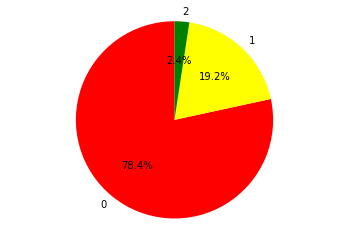

In [114]:
labels= df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe().index
colors=['red', 'yellow', 'green']
sizes= df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe()["count"]
LTVCluster_Pie= plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Biggest cluster we have is cluster 0 which is 78.4% of the total base. If we blindly say, every customer belongs to cluster 0, then our accuracy would be 78.4%.

79% vs 78.4% tell us that our machine learning model is a useful one but needs some improvement for sure. We should find out where the model is failing.

We can identify that by looking at classification report:

In [115]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      6944
           1       0.17      0.04      0.07      1679
           2       0.00      0.00      0.00       206

    accuracy                           0.75      8829
   macro avg       0.32      0.33      0.31      8829
weighted avg       0.65      0.75      0.69      8829

******************************
 
Logistic Regression classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6944
           1       0.00      0.00      0.00      1679
           2       0.00      0.00      0.00       206

    accuracy                           0.79      8829
   macro avg       0.26      0.33      0.29      8829
weighted avg       0.62      0.79      0.69      8829

******************************
 
Random Forest classifica

As we handle the Gradient Boosting model;

Precision and recall are acceptable for 0.

As an example, for cluster 0 (Low LTV), if model tells us this customer belongs to cluster 0, 79 out of 100 will be correct (precision). And the model successfully identifies 100% of actual cluster 0 customers (recall). 

We really need to improve the model for other clusters. For example, this model can not detect Mid LTV customers. Possible actions to improve those points:

- Adding more features and improve feature engineering
- Apply hyper parameter tuning to current model
- Add more data to the model if possible

<div style="color:white; font-size:125%; text-align:left; display:fill; border-radius:5px; background-color:#1E90FF; overflow:hidden">Thanks for reading. I hope you enjoy it and that it was helpful to you.<br>Please don't forget to follow me and give an upvote on</br>
👇👇👇
</div>

**<a href="https://www.kaggle.com/drindeng/" target="_blank" rel="noopener noreferrer">[Kaggle]</a> | 
<a href="https://github.com/drindeng" target="_blank" rel="noopener noreferrer">[GitHub]</a> |
<a href="https://www.linkedin.com/in/turgay-turker/" target="_blank" rel="noopener noreferrer">[Linkedin]</a>**